In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
a=np.load('X_train.npy')
b=np.load('Y_train.npy')

In [3]:
from keras_preprocessing.image import ImageDataGenerator

In [4]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [5]:
import keras
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [6]:
input_shape = (224, 224, 3)

In [7]:
num_of_class = 14

In [8]:
img_in = Input(input_shape)              #input of model 
model = InceptionV3(include_top= False , # remove  the  fully-connected layers at the top of the network
                weights='imagenet',      # pre train weight 
                input_tensor= img_in, 
                input_shape= input_shape,
                pooling ='avg') 

x = model.output  
predictions = Dense(num_of_class, activation="sigmoid", name="predictions")(x)    # fuly connected layer for predict class 
model = Model(inputs=img_in, outputs=predictions)

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [10]:
import keras.backend as K

In [11]:
adam = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [12]:
def unweighted_binary_crossentropy(y_true, y_pred):
    """
    Args:
        y_true: true labels
        y_pred: predicted labels

    Returns: the sum of binary cross entropy loss across all the classes

    """
    return K.sum(K.binary_crossentropy(y_true, y_pred))

In [13]:
model.compile(optimizer=adam, loss=unweighted_binary_crossentropy, metrics=['accuracy'])

In [14]:
model.fit_generator(datagen.flow(a,b, batch_size=32),
                    steps_per_epoch=100, epochs=400)

Instructions for updating:
Use tf.cast instead.
Epoch 1/400


/opt/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


100/100 [==============================] - 33s 330ms/step - loss: 172.1680 - acc: 0.3016
Epoch 2/400
100/100 [==============================] - 19s 186ms/step - loss: 162.4008 - acc: 0.2969
Epoch 3/400
100/100 [==============================] - 19s 187ms/step - loss: 162.1663 - acc: 0.2797
Epoch 4/400
100/100 [==============================] - 19s 186ms/step - loss: 149.6158 - acc: 0.2869
Epoch 5/400
100/100 [==============================] - 19s 187ms/step - loss: 139.2701 - acc: 0.2825
Epoch 6/400
100/100 [==============================] - 19s 187ms/step - loss: 136.9581 - acc: 0.3116
Epoch 7/400
100/100 [==============================] - 19s 187ms/step - loss: 137.5035 - acc: 0.3047
Epoch 8/400
100/100 [==============================] - 19s 190ms/step - loss: 139.7061 - acc: 0.2847
Epoch 9/400
100/100 [==============================] - 19s 189ms/step - loss: 137.2173 - acc: 0.2900
Epoch 10/400
100/100 [==============================] - 19s 188ms/step - loss: 137.6641 - acc: 0.2994
E

100/100 [==============================] - 18s 183ms/step - loss: 134.1159 - acc: 0.2987
Epoch 82/400
100/100 [==============================] - 18s 183ms/step - loss: 135.8057 - acc: 0.2809
Epoch 83/400
100/100 [==============================] - 18s 183ms/step - loss: 133.7689 - acc: 0.3056
Epoch 84/400
100/100 [==============================] - 18s 182ms/step - loss: 132.6924 - acc: 0.3222
Epoch 85/400
100/100 [==============================] - 18s 183ms/step - loss: 134.0855 - acc: 0.3147
Epoch 86/400
100/100 [==============================] - 18s 183ms/step - loss: 133.2225 - acc: 0.2994
Epoch 87/400
100/100 [==============================] - 18s 183ms/step - loss: 131.5140 - acc: 0.3038
Epoch 88/400
100/100 [==============================] - 18s 183ms/step - loss: 131.7235 - acc: 0.2866
Epoch 89/400
100/100 [==============================] - 18s 183ms/step - loss: 132.2303 - acc: 0.2991
Epoch 90/400
100/100 [==============================] - 18s 183ms/step - loss: 132.7400 - acc: 

100/100 [==============================] - 18s 182ms/step - loss: 131.1418 - acc: 0.3244
Epoch 161/400
100/100 [==============================] - 18s 182ms/step - loss: 129.6233 - acc: 0.3387
Epoch 162/400
100/100 [==============================] - 18s 182ms/step - loss: 130.0676 - acc: 0.3194
Epoch 163/400
100/100 [==============================] - 18s 183ms/step - loss: 128.0514 - acc: 0.3188
Epoch 164/400
100/100 [==============================] - 18s 182ms/step - loss: 133.1394 - acc: 0.3281
Epoch 165/400
100/100 [==============================] - 18s 182ms/step - loss: 131.5452 - acc: 0.3113
Epoch 166/400
100/100 [==============================] - 18s 182ms/step - loss: 129.0233 - acc: 0.3188
Epoch 167/400
100/100 [==============================] - 18s 182ms/step - loss: 129.2281 - acc: 0.3369
Epoch 168/400
100/100 [==============================] - 18s 182ms/step - loss: 130.0675 - acc: 0.3028
Epoch 169/400
100/100 [==============================] - 18s 182ms/step - loss: 130.340

100/100 [==============================] - 18s 183ms/step - loss: 126.1999 - acc: 0.3478
Epoch 240/400
100/100 [==============================] - 18s 183ms/step - loss: 127.0281 - acc: 0.3237
Epoch 241/400
100/100 [==============================] - 18s 183ms/step - loss: 124.5780 - acc: 0.3394
Epoch 242/400
100/100 [==============================] - 18s 183ms/step - loss: 124.5200 - acc: 0.3344
Epoch 243/400
100/100 [==============================] - 18s 183ms/step - loss: 123.5416 - acc: 0.3563
Epoch 244/400
100/100 [==============================] - 18s 183ms/step - loss: 124.9512 - acc: 0.3306
Epoch 245/400
100/100 [==============================] - 18s 183ms/step - loss: 124.7448 - acc: 0.3291
Epoch 246/400
100/100 [==============================] - 18s 183ms/step - loss: 122.2352 - acc: 0.3382
Epoch 247/400
100/100 [==============================] - 18s 183ms/step - loss: 124.7429 - acc: 0.3259
Epoch 248/400
100/100 [==============================] - 18s 183ms/step - loss: 125.525

100/100 [==============================] - 18s 183ms/step - loss: 121.8644 - acc: 0.3628
Epoch 319/400
100/100 [==============================] - 18s 182ms/step - loss: 120.3550 - acc: 0.3719
Epoch 320/400
100/100 [==============================] - 19s 192ms/step - loss: 122.7596 - acc: 0.3531
Epoch 321/400
100/100 [==============================] - 18s 182ms/step - loss: 121.0198 - acc: 0.3400
Epoch 322/400
100/100 [==============================] - 18s 182ms/step - loss: 121.4059 - acc: 0.3572
Epoch 323/400
100/100 [==============================] - 18s 183ms/step - loss: 122.1683 - acc: 0.3547
Epoch 324/400
100/100 [==============================] - 18s 182ms/step - loss: 120.2423 - acc: 0.3685
Epoch 325/400
100/100 [==============================] - 18s 183ms/step - loss: 120.6354 - acc: 0.3581
Epoch 326/400
100/100 [==============================] - 18s 183ms/step - loss: 121.2626 - acc: 0.3609
Epoch 327/400
100/100 [==============================] - 18s 183ms/step - loss: 122.774

100/100 [==============================] - 18s 183ms/step - loss: 118.9672 - acc: 0.3762
Epoch 398/400
100/100 [==============================] - 18s 183ms/step - loss: 117.3883 - acc: 0.3834
Epoch 399/400
100/100 [==============================] - 18s 183ms/step - loss: 118.1271 - acc: 0.3841
Epoch 400/400
100/100 [==============================] - 18s 183ms/step - loss: 116.0936 - acc: 0.3850


In [15]:
all_labels = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening', 
'Cardiomegaly', 'Nodule', 'Mass', 'Hernia']

In [16]:
c=np.load('X_test.npy')

In [17]:
d=np.load('Y_test.npy')

In [18]:
pred_Y = model.predict(c, batch_size = 32, verbose = True)

10352/10352 [==============================] - 14s 1ms/step


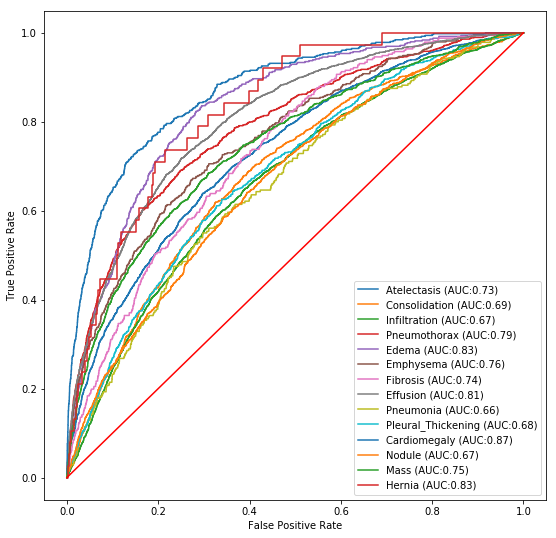

In [19]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(d[:,idx].astype(int), pred_Y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
x = np.linspace(0,1,100)
y=x
c_ax.plot(x,y,'-r')
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('INCEPTIONold 400.png')

In [20]:
id=[1,11,2,5,8,6,7,14,3,13,12,10,9,4]

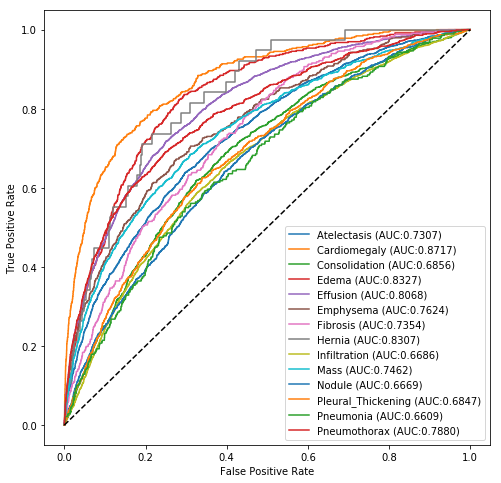

In [21]:
fig1, c_ax1 = plt.subplots(1,1, figsize = (8, 8))
for i in range(14):
    k=id[i]
    c_label=all_labels[k-1]
    fpr, tpr, thresholds = roc_curve(d[:,k-1].astype(int), pred_Y[:,k-1])
    c_ax1.plot(fpr, tpr, label = '%s (AUC:%0.4f)'  % (c_label, auc(fpr, tpr)))
x = np.linspace(0,1,100)
y=x
c_ax1.plot(x,y,'--k')
c_ax1.legend()
c_ax1.set_xlabel('False Positive Rate')
c_ax1.set_ylabel('True Positive Rate')
fig1.savefig('INCEPTIONold 4001.png')

In [22]:
np.save("Predictions_Inception400",pred_Y)